## Convolution Neural Networks: Application

Welcome to the Course 4's second assignment! In this notebook, you will:
* Create a mood classifier using the TF Keras Sequential API
* Build a convNet to identify sign language using the TF Keras Functional API

After this assignment, you will be able to:
* Build and train a ConvNet in TensorFlow for a binary classification problem
* Build and train a ConvNet in TensorFlow for a multi-class classification problem
* Explain different use cases for the Sequential and Functional APIs in TensorFlow Keras

To complete this assignment, you should already be familiar with TensorFlow. If you are not, please refer back to the **TensorFlow Tutorial** of the third week of Course 2 ("**Improving deep neural networks**").


In [1]:
import os

In [2]:
os.chdir('/Users/madongdong/Deep-learning/Chapter04-Convolutional-Neural-Networks/W1A2')

In [3]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import  tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops
from cnn_utils import *
from test_utils import summary, comparator

%matplotlib inline
np.random.seed(1)


2025-12-10 21:36:11.523505: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## 1.1 Load the data and split Data into Train/Test sets
You will be using the Happy House Dataset for this part of the assignment, which contains people's face. Your task will be to build a ConvNet that determines whether the peope in the images are smiling or not -- because they only get to enter house if they are smiling!



In [22]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_happy_dataset()

### Normalize image vectors
X_train = X_train_orig/255.0
X_test = X_test_orig/255.0

## Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))    
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


You can display the images contained in the dataset. Images are 64x64 pixels in RGB format with 3 channels.

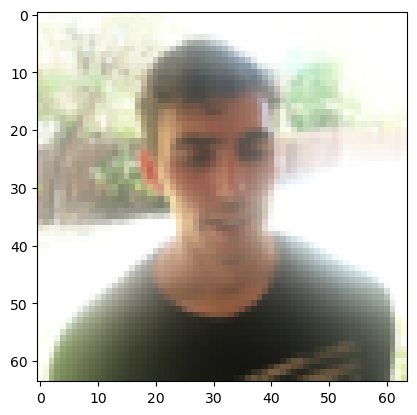

In [29]:
index = 121
plt.imshow(X_train_orig[index])
plt.show()

### 2 - Layers in TF Keras
In the previous assignment, you created layers manually in numpy. In TF.Keras, you don't have to write code directly to create layers. Rather, TF Keras has pre-defined layers you can use. 

When you create a layer in TF Keras, you are creating a function that takes some input and transforms it into an output you can reuse later. Nice and easy!

